In [1]:
# Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de las gráficas
sns.set_theme()

In [2]:
resistencias_df = pd.read_excel('Resistencias.xlsx', sheet_name='Hoja2')
resistencias_df 

,N,R total [MΩ],Error [MΩ]
0,1,3.48,0.04740
1,2,3.55,0.04775
2,3,4.69,0.05345
3,4,3.31,0.04655
4,5,3.74,0.04870
5,6,3.80,0.04900
6,7,3.36,0.04680
7,8,3.41,0.04705
8,9,3.57,0.04785
9,10,4.72,0.05360


In [3]:
resistencias_df.columns = resistencias_df.columns.str.replace(' [MΩ]', '').str.lower().str.replace(' ', '_')
resistencias_df

,n,r_total,error
0,1,3.48,0.04740
1,2,3.55,0.04775
2,3,4.69,0.05345
3,4,3.31,0.04655
4,5,3.74,0.04870
5,6,3.80,0.04900
6,7,3.36,0.04680
7,8,3.41,0.04705
8,9,3.57,0.04785
9,10,4.72,0.05360


In [4]:
resistencias_df.describe()

,n,r_total,error
count,60.000000,60.000000,60.000000
mean,30.500000,3.685667,0.048428
std,17.464249,0.439601,0.002198
min,1.000000,3.000000,0.045000
25%,15.750000,3.367500,0.046838
50%,30.500000,3.570000,0.047850
75%,45.250000,3.857500,0.049287
max,60.000000,5.090000,0.055450


In [5]:
def comprobar_limite_central (data, m, intervalos=None):
    
    resistencias_promediadas_df = data.rolling(window=m).mean()
    resistencias_promediadas_df.dropna(inplace=True)
    
    intervalos = int(round(np.sqrt(len(resistencias_promediadas_df)))) if intervalos is None else intervalos
    
    sns.histplot(data=resistencias_promediadas_df, x='r_total', bins=intervalos, stat='density')
    # sns.kdeplot(data=resistencias_promediadas_df, x='r_total', color='blue', label='KDE')
    plt.xlabel('Resistencia [MΩ]')
    plt.ylabel('Densidad de Frecuencia')
    # plt.title(f'Histograma de Resistencias')
    plt.title(f'Histograma de Resistencias Promediadas (m={m})')
    
    resistencias_sigma_m = resistencias_promediadas_df.r_total.std()
    resistencias_miu_m= resistencias_promediadas_df.r_total.mean()
    
    x = np.linspace(resistencias_miu_m - 4*resistencias_sigma_m, resistencias_miu_m + 4*resistencias_sigma_m, 100)
    
    distribucion_normal = 1/(np.sqrt(2 * np.pi)*resistencias_sigma_m) * np.exp(-0.5 * ((x - resistencias_miu_m)/resistencias_sigma_m)**2)
    sns.lineplot(x= x, y=distribucion_normal, color='red', label='Distribución Normal')
    plt.legend()
    
    plt.show()
    
    print(f'S(m = {m}, R_promedio): {resistencias_promediadas_df.r_total.std()}\n\nS_R/√(m): {data.r_total.std()/np.sqrt(m)}')

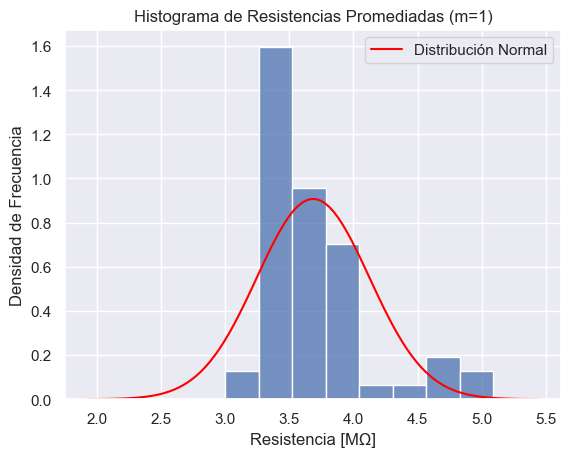

S(m = 1, R_promedio): 0.43960061483689006

S_R/√(m): 0.43960061483689006


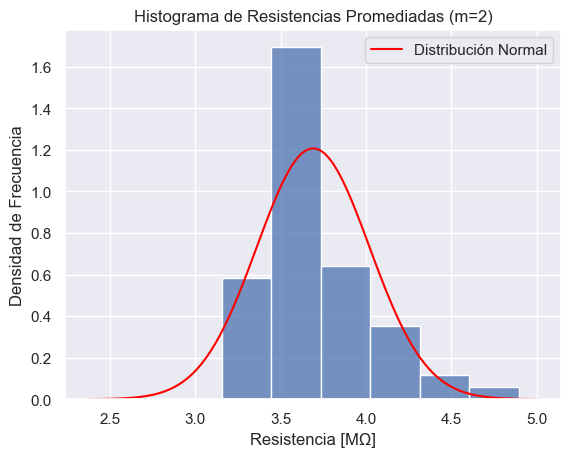

S(m = 2, R_promedio): 0.3302989321363703

S_R/√(m): 0.31084457576494057


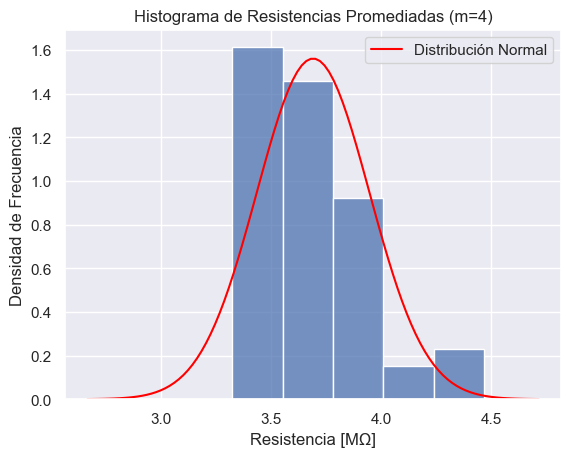

S(m = 4, R_promedio): 0.25568460303285795

S_R/√(m): 0.21980030741844503


In [6]:
comprobar_limite_central(resistencias_df, 1, 8)
comprobar_limite_central(resistencias_df, 2, 6)
comprobar_limite_central(resistencias_df, 4, 5)